#### <a id='top'></a>

# Homework 3: Conditional Probability and Random Choice 
***

**Name**: Margaux McFarland

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 21**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

## (25 pts) Problem 1: Theory (Independence)

In the popular video game series Pokémon, players conduct battles between their pokémon (creatures). In the main series of games, these battles are [turn-based](#https://en.wikipedia.org/wiki/Turns,_rounds_and_time-keeping_systems_in_games#Turn-based), similar to a game of checkers, chess, or Go.

Let's create a new set of rules for a pokémon duel so they don't have to battle until they faint. For our example, we will look at Pikachu vs. Eevee. Pikachu has a higher base Speed, so they will get to move first.

* The duel is composed of an unknown number of rounds (same as Pokémon).
* Each round is still turn-based, it consists of Pikachu trying to strike Eevee, then Eevee trying to strike Pikachu.
* If Pikachu manages to strike Eevee, then Pikachu is awarded a point, and similarly if Eevee manages to strike Pikachu, then Eevee is awarded a point.
* If a round ends in a tie, then Pikachu and Eevee proceed to another round. If a round ends with one pokémon scoring a point but the other one does not, then the pokémon who scored a point wins the duel.

Let $U$ be the event that "Picachu wins the duel", $F$ be the event that "the duel ends after the first round of strikes", and $C$ be the event that "the duel continues after the first round of strikes".  Suppose that the result of one strike is independent of the other strikes, Picachu successfully lands their strikes with probability $p$ (based on their accuracy and Eevee's evasiveness), and Eevee similarly lands their strikes with probability $q$.

**Part A**: The duel will continue until Picachu or Eevee wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual strikes by $H$ for a hit and $M$ for a miss. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

HINT: Remember that Pikachu has the first strike in each round!

$\Omega = \{HM, MH, HHHM, HHMH, HHHHHM, HHHHMH, ...\}$  
There must always be an event number of hits and misses combined because each player gets a turn after the other. The round will always end with a miss (Eevee) or a miss then a hit (Pikachu misses).

**Part B**: Determine $P(U \mid F)$ in terms of $p$ and $q$.

The probability of Pikachu winning given the duel ends after the first round of strikes can also be written as $\frac{P(U \cap F)}{P(F)}$. 

If the duel only lasts one round then that means there will only by two hits or misses. The only two possibilites are HM or MH. In terms of p and q, p and not q or not p and q or $P(F) = (p \cap !q) \cup (!p \cap q)$. The proability the Pikachu wins and there is only one wrong reduced the previous equation to $P(U \cap F) = (p \cap !q)$. 

Therefore, $P(U|F) = \frac{(p \cap !q)}{(p \cap !q) \cup (!p \cap q)}$. Not q can also be written as 1-q and p and q are independent of one another so p and (1-q) can be multiplied together. This simplifies the expression to
$P(U|F) = \frac{p(1-q)}{p - pq + q -pq} = \frac{p(1-q)}{p + q - 2pq}$.

**Part C**: Explain why events $C$ and $U$ are independent. 

For C and U to be independent the $P(C \cap U) = P(C)*P(U)$ must hold. In other words, pikachu could win whether it was on the first round or the second or third. It was given that one strike does not affect the other strike, no missing in one round has no affect on hitting in another and winning. Pikachu winning does not depend on or is independent from the duel continueing after the first.

**Part D**: Use the Law of Total Probability to show that $P(U) = p(1-q) + (2pq - p - q +1) ~P(U \mid C)$. 

The total law of probability is the sum of conditionals of, in this case, pikachu winning. 

P(U) = P(U|F)P(F) + P(U|C)P(C)

As explained above $P(U|F) = \frac{p(1-q)}{p + q - 2pq}$ and $P(F) = (p \cap !q) \cup (!p \cap q) = p + q + 2pq$.
P(C) or the probability that the duel goes past the first round means that the players must both hit or both miss HH or MM in the first round. $P(C) = !P(F) = (1-p)(1-q) + pq = 2pq - p - q + 1$.

In sum, we have $P(U) = p(1 - q) + (2pq - p - q + 1)P(U | C)$

**Part E**: Use the fact from **Part B** that $P(U \mid C) = P(U)$ to determine $P(U)$ in terms of $p$ and $q$.

$P(U \mid C) = P(U)$ because P(U) and P(C) are independent. It does not matter what round we are on, it only matters whether Pikachu hits and Eevee misses. From part D and plugging in P(U) for P(U|C), we have $P(U) = p(1-q) + (1 - p - q + 2pq)*P(U)$.

$P(U)( 1 - (1 - p - q + 2pq) = p(1-q)$

$P(U) = \frac{p(1-q)}{p + q - 2pq}$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

For the same reason that U and C are independent from part C, U and F are also independent. It does not matter which round of the duel we are on, whether or not Pikachu wins only depends on if he strikes and Eevee misses. Because the two events are independent then P(U|F) = P(U) just like P(U|C) = P(U) so the two probabilities are equal.

**Part G**: Explain the significance of the solution technique for $P(U)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

To calculate P(U) directly would be too complicated because there are an infinite number of rounds which would make solving for P(U|C) difficult. This solution was significant because U and C are independent. We cannot always use this techique because two events may not be considered independent. The assumption made at the begininning of the problem that each strike is independent of the next led to the assumption that each round is independent of the next and, therefore, the winner is independent of the number of rounds or matches.

[Back to top](#top)
<a id='p2'></a>

## (30 pts) Problem 2: Computation (Joker Poker Hands)
***


A common example for discrete counting and probability questions are poker hands.  Consider using a standard 52-card playing deck, with card faces `[A,2,3,4,5,6,7,8,9,10,J,Q,K]` across the standard 4 suits: `[C,D,H,S]`.  For the markdown portions of this problem, you may leave your answer in terms of a ratio of products, but you should simplify away any combinatoric notation such as ${n \choose k}$ or $P(n,k)$.

**Part A:**

Suppose we draw 5 cards at random from the deck.  What is the probability that we have a "3 of a kind:" a hand with 3 copies of one face card and the other two cards unmatched?

In order to get three of a kind of only face cards the options are JJJxy, QQQxy, KKKxy where the x does not equal y because that would create a full house and x or y does not equal J, Q, or K in its repsective case because that would create a four of a kind. So for the three of a kind there are 3 face value options, C(3, 1) = 3 and 3 out of 4 of the suits will be chosen, C(4,3) = 4, making $3*4 =12$. 

The next two cards to not make a four of a kind or have the same value as one another, so there are 2 slots to fill and 13-3 different values they could be, C(10, 2). The suit does not matter for either card so $2*C(10, 2)*C(4,1) =  360$. 

Then $360*12 = 4320$. 

Finally, we divide by the total number of 5 card poker hands or C(52,5) = 2598960, so $P(3ofakind) = \frac{4320}{2598960}$. 

**Part B:**

Suppose we add a single "Joker" card to the deck.  The Joker may serve as a copy of any card in the deck, including one already in our hand.  

Suppose we draw 5 cards at random from the deck.  What is the probability that we now have "3 of a kind?"  This should now include hands with 2 copies of one face and a joker (and the other 2 as non-paired cards).

The difference here is now one of the cards must be a joker and there is only one joker so C(1,1) = 1. There are still only three values J, Q, K for the first two, C(3, 1) = 3, but now only 2 of the four suits need to be chosen, C(4, 2) = 6, so $3*6*1 = 18$. Same as before, two non-paired with an suit cards will be $2*C(10, 2)*C(4,1) =  360$. 

$360 * 18 = 6480$

Now, we divide by the total number of 5 card poker hands in a 53 card deck because of the added joker or C(53,5) = 2869685, so $P(3ofakind w/joker) = \frac{6480}{2869685}$. 

**Part C:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed.  Verify that the result is consistent with your answer to part A.

In [212]:
import random

def is_three_ofa_kind():
    #all cards in deck
    jacks = ['j', 'j','j', 'j']
    queens = ['q', 'q','q', 'q']
    kings = ['k', 'k','k', 'k']
    others = ['A', 'A', 'A', 'A', 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10];
    
    deck = jacks + queens + kings + others
    
    #draw 5 random cards from deck
    poker_hand = random.sample(deck, k = 5)
    
    #check and return if three of a kind
    if (poker_hand.count('j') == 3 or poker_hand.count('q') == 3 or poker_hand.count('k') == 3):
        #check is other two are not matching
        if (poker_hand.count('A') !=  2 and poker_hand.count(2) != 2 and poker_hand.count(3) != 2 and poker_hand.count(4) !=  2 and poker_hand.count(5) != 2 and poker_hand.count(6) != 2 and poker_hand.count(7) !=  2 and poker_hand.count(8) != 2 and poker_hand.count(9) != 2 and poker_hand.count(10) != 2):
            return 1
        else:
            return 0
    else:
        return 0

sum = 0
for i in range(10000):
    sum = sum + is_three_ofa_kind()
print("Three of a kind was observed {} times".format(sum))
print("Probability = {}".format(sum/10000))

Three of a kind was observed 43 times
Probability = 0.0043


According to part A, the proability of a three of a kind of face cards is 0.0016 or 0.16% and this simulation hovers around 0.4%. So this simulation is slightly more conservative about the probability of getting a three-of-a-kind.

**Part D:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck where one "Joker" card has been added.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed.   Verify that the result is consistent with your answer to part B.

In [213]:
def is_three_ofa_kind_joker():
    #all cards in deck
    jacks = ['j', 'j','j', 'j']
    queens = ['q', 'q','q', 'q']
    kings = ['k', 'k','k', 'k']
    others = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10];
    
    #add a joker
    joker = ['joker']
    deck = jacks + queens + kings + others + joker
    
    #draw 5 random cards from deck
    poker_hand = random.sample(deck, k = 5)
    
    #check and return if three of a kind
    if ((poker_hand.count('j') == 2 or poker_hand.count('q') == 2 or poker_hand.count('k') == 2) and poker_hand.count('joker') == 1):
        #check is other two are not matching
        if (poker_hand.count(1) !=  2 and poker_hand.count(2) != 2 and poker_hand.count(3) != 2 and poker_hand.count(4) !=  2 and poker_hand.count(5) != 2 and poker_hand.count(6) != 2 and poker_hand.count(7) !=  2 and poker_hand.count(8) != 2 and poker_hand.count(9) != 2 and poker_hand.count(10) != 2):
            return 1
        else:
            return 0
    else:
        return 0

sum = 0
for i in range(10000):
    sum = sum + is_three_ofa_kind_joker()
print("Three of a kind was observed {} times".format(sum))
print("Probability = {}".format(sum/10000))

Three of a kind was observed 69 times
Probability = 0.0069


The probability found in part B was greater than the probability found in part A, so it makes sense that this proability is slighlty more than from part C. This simulation's probability hovers around 0.5% which is on the same order of magitude as the probability from part B, 0.2%.

**Part E:**

Write a simulation that draws a hand of 5 cards from a standard 52-card deck with four "Joker" cards added.  Repeat this simulation 10000 times, and report how many "3 of a kind" hands were observed. (NB: 3 unpaired cards and 2 Jokers is the new case of "3 of a kind".)

In [214]:
def is_three_ofa_kind_4joker():
    #all cards in deck
    jacks = ['j', 'j','j', 'j']
    queens = ['q', 'q','q', 'q']
    kings = ['k', 'k','k', 'k']
    others = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10];
    
    #add a joker
    joker = ['joker', 'joker','joker','joker']
    deck = jacks + queens + kings + others + joker
    
    #draw 5 random cards from deck
    poker_hand = random.sample(deck, k = 5)
    
    #check and return if two jokers
    if (poker_hand.count('joker') == 2):
        #check is other three are not matching
        if (poker_hand.count('j') <= 1 and poker_hand.count('q') <= 1 and poker_hand.count('k') <= 1 and poker_hand.count(1) <=  1 and poker_hand.count(2) <= 1 and poker_hand.count(3) <= 1 and poker_hand.count(4) <=  1 and poker_hand.count(5) <= 1 and poker_hand.count(6) <= 1 and poker_hand.count(7) <=  1 and poker_hand.count(8) <= 1 and poker_hand.count(9) <= 1 and poker_hand.count(10) <= 1):
            return 1
        else:
            return 0
    else:
        return 0

sum = 0
for i in range(10000):
    sum = sum + is_three_ofa_kind_4joker()
print("Three of a kind was observed {} times".format(sum))
print("Probability = {}".format(sum/10000))

Three of a kind was observed 295 times
Probability = 0.0295


[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Simulation
*** 

In this problem you will write some code to simulate the movement of budding Data Scientist Skyler - founder of infamous Skynet - as they navigate their way through the Engineering Center Lobby between classes.  Skyler has 10 minutes to navigate the labryinthine space below:

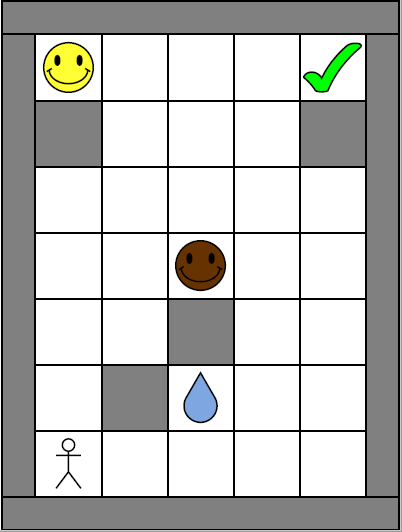

Skyler starts at the bottom left (SW) corner, a square we will refer to as $(0,0)$, and is trying to reach their next class in the top right (or NE) corner, a square at (4,6) using a standard cartesian system.

Skyler, unfortunately, is very disoriented and their movement is partly random.  1/3 of the time Skyler will try to walk North; 1/3 of the time Skyler will try to walk East, and the rest of the time Skyler will split evenly between South and West.

Your goal is to figure out what the probability is that Skyler makes it to (4,6) before running out of time, with the following hazards:

 - Skyler walks at a standard rate of 10 seconds per tile.  If Skyler walks into one of the dark-shaded walls or pillars, they remain where they started, but it still takes 10 seconds.

 - Someone spilled a foul-smelling energy drink at (2,1).  If Skyler moves into the tile in (2,1), they are completely grossed out.  They move back to the start at (0,0) and spend a little time cleaning their shoes, losing 60 additional seconds beyond the time to originally move into (2,1).
 
 - Skyler's data science professor is drinking coffee at (2,3), and Skyler hasn't turned in their homework for a week and a half.  If Skyler walks to that tile, they suffer through some tedious conversation and then shuffle *backwards* from where they came by an extra tile, so if they encountered the professor in a movement from (1,3) to (2,3) they would recoil back to (0,3).  This entire process takes 90 seconds, including all movement.
 
 - Skyler's best friend and coding collaborator is at (0,6).  Should Skyler walk there, they will engage in a lengthy conversation, taking 120 seconds, including all movement.



<br>

**Part A**: Complete the function sky_step below. The function should simulate one step of Skyler's.  It should take as arguments the Skyler's current location on the board as well as the the time elapses, and return Skyler's new location and time elapses after the movement has completed. Note that if Skyler runs out of time, you should return 310 and not any additional wasted time.

In [215]:
def sky_step(location, time):
    #weights of step locations
    weight_N = 1/3 #north
    weight_E = 1/3 #East
    weight_S = 1/6 #South
    weight_W = 1/6 #West
    
    directions = ['N', 'E', 'S', 'W']
    
    #generate a random step
    step = random.choices(directions, weights = [weight_N, weight_E, weight_S, weight_W], k = 1)
    
    #update location
    location_new = location
    if step[0] == 'N':
        location_new[1]= location[1] + 1
    elif step[0] == 'E':
        location_new[0] = location[0] + 1
    elif step[0] == 'S':
        location_new[1] = location[1] - 1
    elif step[0] == 'W':
        location_new[0] = location[0] - 1
        
  
        
    #check to see if wall
    if location_new[0] < 0 or location_new[1] < 0 or location_new[0] > 4 or location_new[1] > 6 :
        location_new = location
        time = time + 10
    #check to see if hit a pillar
    elif location_new == [1,1] or location_new == [2,2] or location_new == [0,5] or location_new == [4, 5]:
        location_new = location
        time = time + 10
    #check if hit friend
    elif location_new == [0,6]:
        time = time + 120
    #check if hit prof
    elif location_new == [2,3]:
        time = time + 90
        location_new = location
    #check if hit smelly drink
    elif location_new == [2,1]:
        time = time + 70
        location_new = [0,0]
    else:
        time = time + 10  
    
    location = location_new
    
    #do not go over time frame
    if time > 600:
        time = 610
    
    return location, time



**Part B**: Use your function from **Part A** to simulate at least 10000 of Skyler's 10-minute trips through the Engineering Lobby and make a frequency histogram of the Skyler's time elapsed at the end of your simulation (including instances where they did not make it in time).

In [216]:
#Simulation for Part B

times = [0] *10000
#loop through 10000 times
for i in range(10000):
    location = [0,0]
    time = 0
    while True:
        [location, time] = sky_step(location, time)
        times[i] = time
        
        if time > 600:
            break
        if location == [4, 6]:
            break

            

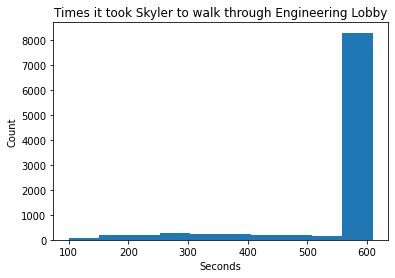

In [217]:
#Frequency histogram
plt.hist(times)
plt.title('Times it took Skyler to walk through Engineering Lobby')
plt.xlabel('Seconds')
plt.ylabel('Count')
plt.show()

**Part C**: Use your code from **Part A** to estimate the probability that Skyler makes it to class on time.

In [218]:
#Estimation of probability of being on time
on_time_count = 0
#of the 10000 times found in part b, how many where less than 600
for i in range(10000):
    if times[i] <= 600:
        on_time_count = on_time_count + 1

prob_on_time = on_time_count/10000
print("Probability Skylar makes it to class on time: {}".format(prob_on_time))


Probability Skylar makes it to class on time: 0.1846


**Part D**: Use your code from **Part A** to estimate the probability that Skyler makes it to class on time _given_ that they talked to their Data Science professor.  Is Skyler more or less likely to make it on time if they talk to their Data Science Professor?

P(class on time | professor) or the probability that Skyler makes it to class on time given they talked to their Data Science professor can also be written as $\frac{P(class on time \cap professor)}{P(professor)}$. The probability that they talk to their professor as found by the code below is almost half of the time 0.4311. Following the equation, P(class on time | professor) = 0.1846. This is equal to the probability that Skylar makes it to class on time, so whether or not Skylar talks to the professor does not really change how likely they are to make it to class on time.

In [219]:
#Estimate probability of being on time given talking to their DS professor

#first find how many times Skyler talked to the professor
prof_count = 0
#of the 10000 times found in part b, how many where less than 600
for i in range(10000):
    time_1 = 0
    loc_1 = [0,0]
    while True:
        [loc_2, time_2] = sky_step(loc_1, time_1)
        if time_2-time_1 == 90:
            prof_count = prof_count + 1 
            
        #reset
        loc_1 = loc_2
        time_1 = time_2
        if time_1 > 600:
            break
        if loc_1 == [4, 6]:
            break
            

prob_prof = prof_count/10000
print("Probability Skylar talks to the professor: {}".format(prob_prof))

#find how many times Skyler talked to the prof and made it to class on time (time < 600)
prob_both = (on_time_count/10000) * (prof_count/10000)
print("Probability Skylar makes it to class on time and they talk to the professor: {}".format(prob_both))

prob_total = prob_both/prob_prof
print("Probability Skylar makes it to class on time given they talk to the professor: {}".format(prob_total))


Probability Skylar talks to the professor: 0.4226
Probability Skylar makes it to class on time and they talk to the professor: 0.07801195999999999
Probability Skylar makes it to class on time given they talk to the professor: 0.1846


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that Skyler talked to their Data Science professor, given that Skyler made it to class on time.

In [220]:
#Estimate probability of talking to their DS professor given being on time  

prob_prof_ontime = prob_both/prob_on_time
print("Probability Skylar talks to the professor given they make it to class on time: {}".format(prob_prof_ontime))

Probability Skylar talks to the professor given they make it to class on time: 0.4226


P(professor | class on time) or the probability that Skyler talks to the professor given Skyler makes it to class on time can also be written as  𝑃(professor ∩ class on time)𝑃(class on time). The probability that Skyler made it to class on time was already calculated in part C. The probability that Skyler talks to the professor and makes it to class on time was calculated in the last part (part_both). So dividing by the two probability yields 0.4226 or about half the time. This is the same probability that Skyler talks to the professor. This makes sense because talking to the professor doesn't really make an impact on whether Skyler makes it to class on time like we discovered in the last part. There is neither a low or high probability that when Skyler makes it to class on time, they also talked to the professor.